In [1]:
import numpy as np
import matplotlib.pyplot as plt
import importlib

import sys
sys.path.append('/../../temp_prog/')
import vb_epsilon_sweeper as vs
import tur_calculator as tc
import plotting_machine as pm



In [2]:
#--SETUP1: ---------------------------------------------------------------------------------
VBs = np.linspace(-200,200, 200) # np.linspace(-10000,10000, 100)
epsilons = np.linspace(-500, 50, 200) # np.linspace(-6000, 6000, 10)
file_name = 'eps_-500_50_VB_-200_200_200/all_value.npz'

In [3]:
#Coulumb diamonds

#--SETUP2: ---------------------------------------------------------------------------------

T_L = 2.5 #100
T_R = 1 #T_L

INPUT = {
    'omega': 0.002, #1000
    'u_intra': 200, #2000
    'u_inter': 100, #1000
    'gammaL': 0.005, #0.5
    'gammaR': 0.005, #0.5
    'T_L': T_L,
    'T_R': T_R,
}

In [4]:
data = np.load(file_name)
I, I_var, P, J_QH, sigma, TUR = data['I'], data['I_var'], data['P'], data['J_QH'], data['sigma'], data['TUR']
print(np.sort(TUR[~np.isnan(TUR)]))
print(I.shape)

[-1.16938832e+02 -7.72269181e+01 -6.84089778e+01 ...  6.56286416e+07
  2.00105911e+08  1.77363835e+11]
(200, 200)


In [5]:
#Zooma in:

#--SETUP: ---------------------------------------------------------------------------------
#VBs_zoom = np.linspace(-10,10, 2) # np.linspace(-10000,10000, 100)
#epsilons_zoom = np.linspace(-15, 15, 2) # np.linspace(-6000, 6000, 10)

VBs_zoom = np.linspace(-10, 10, 200) # np.linspace(-10,10, 200)
epsilons_zoom = np.linspace(-10, 10, 3) # np.linspace(-10, 10, 200)

data_zoom = np.load(f"eps_VB_-10_10_200/lamda0.0.npz")
I_zoom, I_var_zoom, P_zoom, J_QH_zoom, sigma_zoom, TUR_zoom = data_zoom['I'], data_zoom['I_var'], data_zoom['P'], data_zoom['J_QH'], data_zoom['sigma'], data_zoom['TUR']

Text(0, 0.5, '$V_B$')

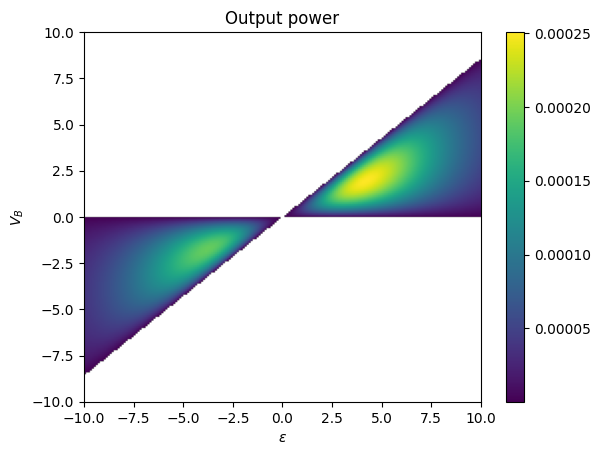

In [6]:
#Plotta power (för test)
P_zoom_masked = np.ma.masked_where(P_zoom <= 0, P_zoom)

plt.imshow(P_zoom_masked, extent=[epsilons_zoom[0], epsilons_zoom[-1], VBs_zoom[0], VBs_zoom[-1]], aspect='auto', origin='lower')
plt.colorbar()
plt.title(r"Output power")
plt.xlabel(r"$\epsilon$")
plt.ylabel('$V_B$')

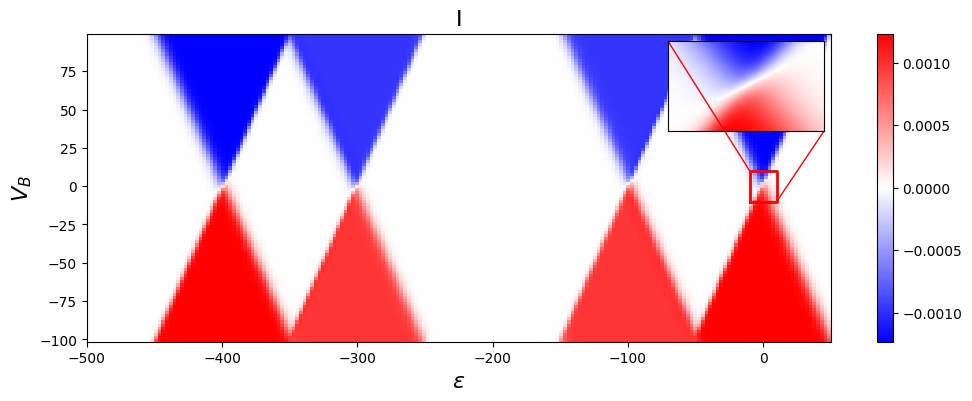

(200, 200)


In [33]:
importlib.reload(pm)
#pm.plot_big_coulomb_report(epsilons, VBs, I, 'I', epsilons_zoom, VBs_zoom, I_zoom)
pm.plot_big_coulomb_report_cropped(epsilons, VBs, I[49:149,:], 'I', epsilons_zoom, VBs_zoom, I_zoom)
print(I.shape)
#[49:149, 49:149]

(200, 200)
200.0


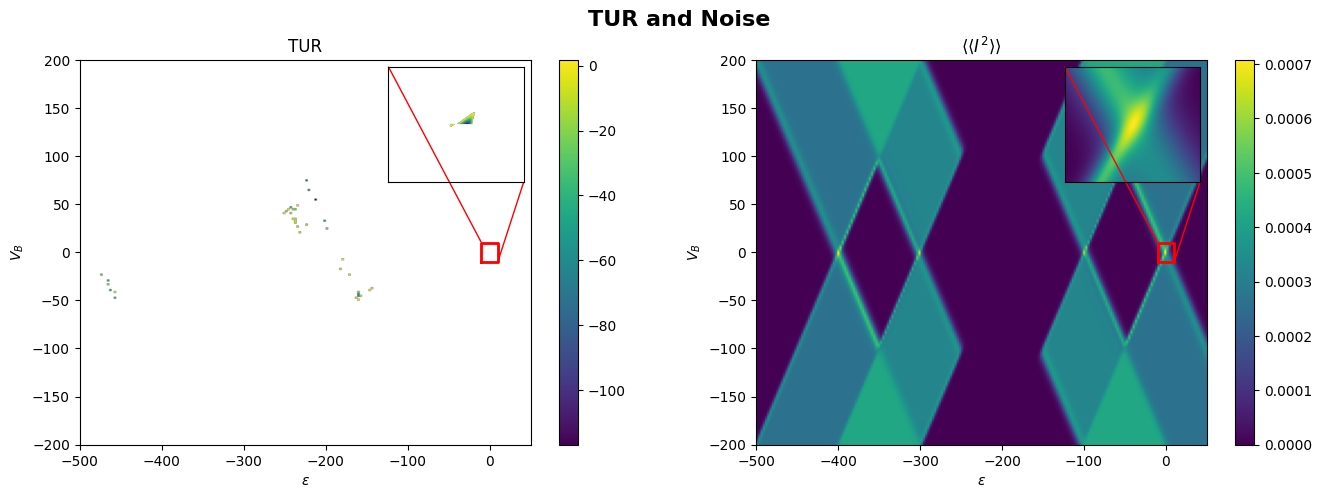

In [ ]:
TUR_masked = np.ma.masked_where(TUR > 2, TUR)
TUR_zoom_masked = np.ma.masked_where(TUR_zoom > 2, TUR_zoom)


importlib.reload(pm)
pm.plot_zoomed_out(epsilons, VBs, TUR_masked,
                    r"TUR", I_var, r"$\langle\langle I^2 \rangle\rangle$", 
                    epsilons_zoom, VBs_zoom, TUR_zoom_masked, I_var_zoom, "TUR and Noise")

200.0


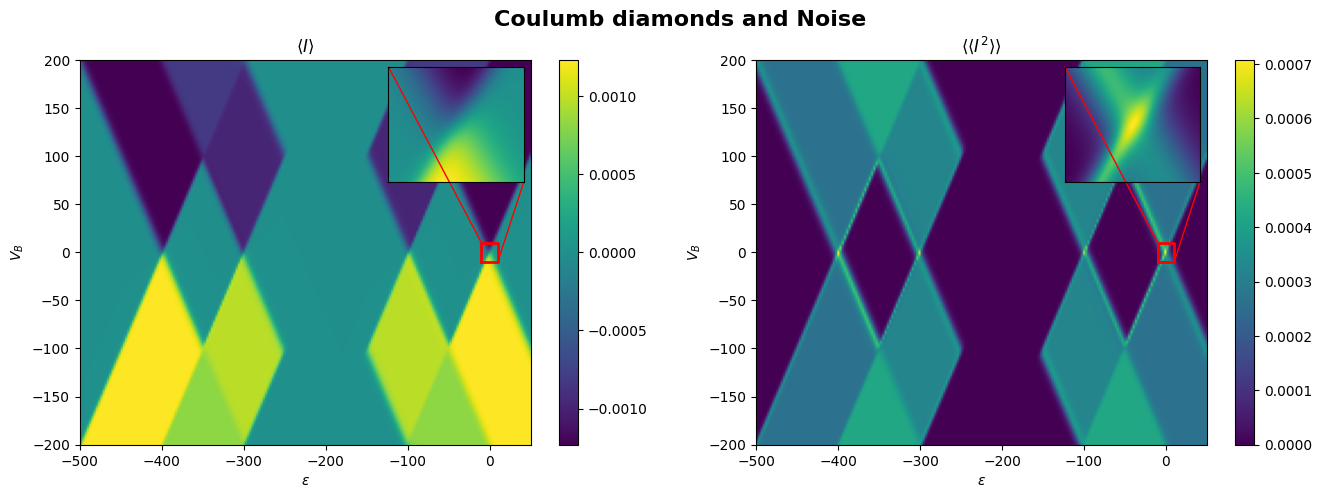

200.0


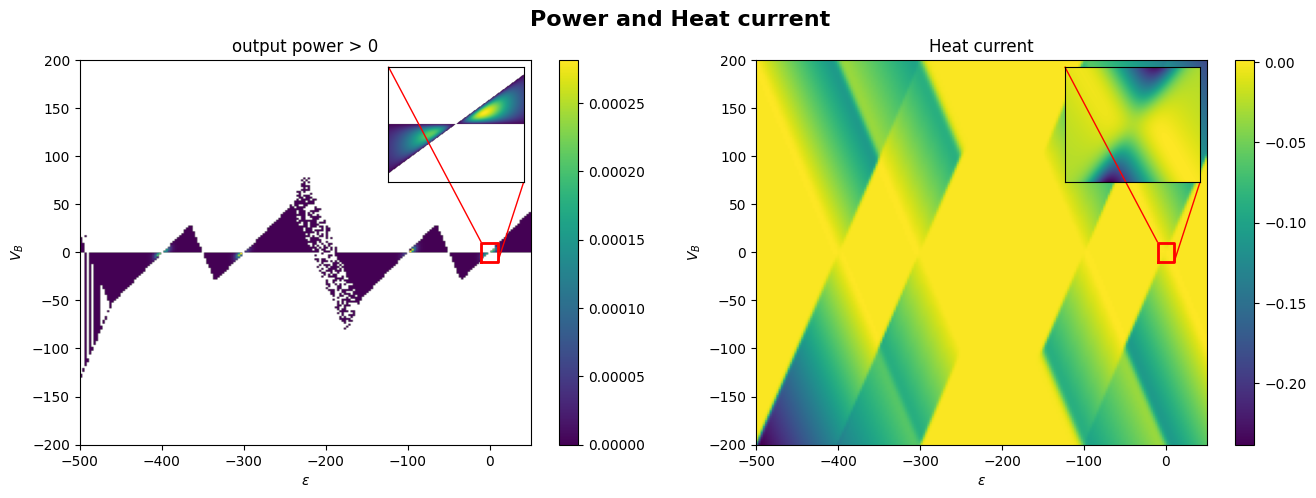

In [8]:
importlib.reload(pm)
pm.plot_zoomed_out(epsilons, VBs, I,
                    r"$\langle I \rangle$", I_var, r"$\langle\langle I^2 \rangle\rangle$", 
                    epsilons_zoom, VBs_zoom, I_zoom, I_var_zoom, "Coulumb diamonds and Noise")

P_masked = np.ma.masked_where(P <= 0, P)
P_zoom_masked = np.ma.masked_where(P_zoom <= 0, P_zoom)

pm.plot_zoomed_out(epsilons, VBs, P_masked,
                    "output power > 0", J_QH, "Heat current", 
                    epsilons_zoom, VBs_zoom, P_zoom_masked, J_QH_zoom, "Power and Heat current")

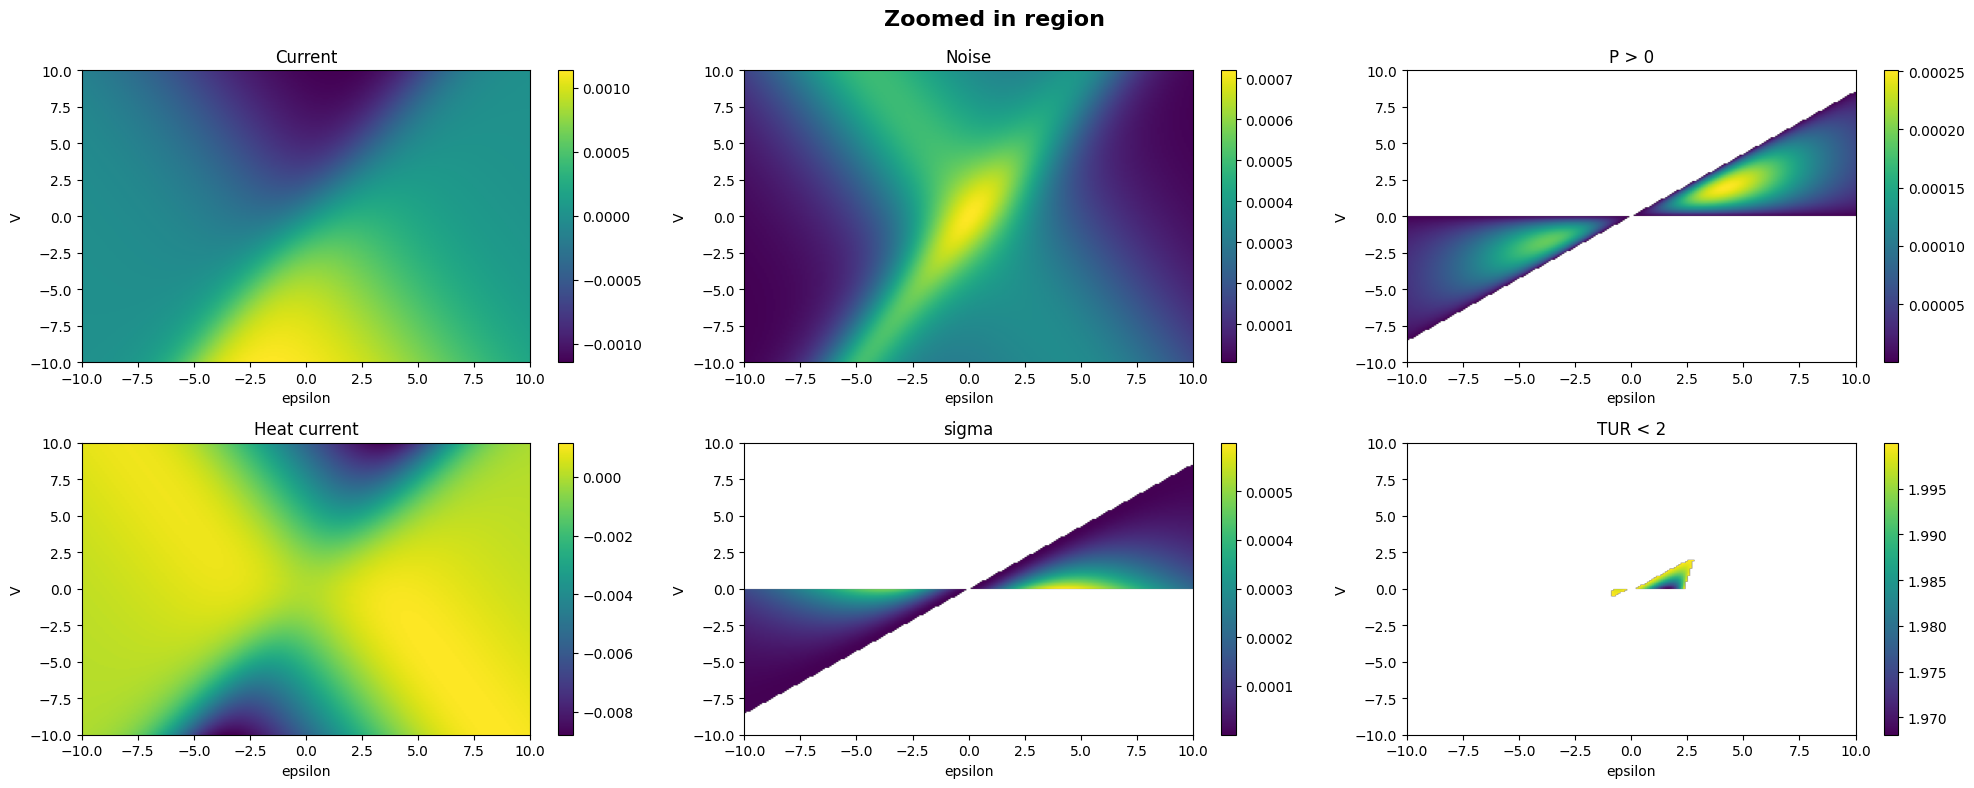

In [9]:
importlib.reload(pm)
pm.plot_all(epsilons_zoom, VBs_zoom, I_zoom, I_var_zoom, P_zoom, J_QH_zoom, sigma_zoom, TUR_zoom, "Zoomed in region")

In [10]:
print(np.nanmin(TUR_zoom))

1.9681027799317712


In [11]:
#ZOOMAR IN PÅ INTRESSANT OMRÅDE:
#(Detta ger TUR = 1.97)
'''
#--SETUP: ---------------------------------------------------------------------------------
VBs_zoom = np.linspace(0,0.5, 20) # np.linspace(-10000,10000, 100)
epsilons_zoom = np.linspace(0, 2.1, 20) # np.linspace(-6000, 6000, 10)
#T = 1
T_L = 2.5 #100
T_R = 1 #T_L

INPUT = {
    'omega': 0.002, #1000
    'u_intra': 200, #2000
    'u_inter': 100, #1000
    'gammaL': 0.005, #0.5
    'gammaR': 0.005, #0.5
    'T_L': T_L,
    'T_R': T_R,
}

#--SETUP: ---------------------------------------------------------------------------------

importlib.reload(vs)
I, I_var, J_QH, P, P_0 = vs.run_sweep(VBs_zoom, epsilons_zoom, **INPUT)
'''

"\n#--SETUP: ---------------------------------------------------------------------------------\nVBs_zoom = np.linspace(0,0.5, 20) # np.linspace(-10000,10000, 100)\nepsilons_zoom = np.linspace(0, 2.1, 20) # np.linspace(-6000, 6000, 10)\n#T = 1\nT_L = 2.5 #100\nT_R = 1 #T_L\n\nINPUT = {\n    'omega': 0.002, #1000\n    'u_intra': 200, #2000\n    'u_inter': 100, #1000\n    'gammaL': 0.005, #0.5\n    'gammaR': 0.005, #0.5\n    'T_L': T_L,\n    'T_R': T_R,\n}\n\n#--SETUP: ---------------------------------------------------------------------------------\n\nimportlib.reload(vs)\nI, I_var, J_QH, P, P_0 = vs.run_sweep(VBs_zoom, epsilons_zoom, **INPUT)\n"

In [12]:
'''
#Beräkna TUR
importlib.reload(tc)
TUR_zoom, eff_carnot_zoom, eff_zoom, sigma_zoom = tc.calculate_tur(T_L=T_L, T_R=T_R, I=I_zoom, I_var=I_var_zoom, J_QH=J_QH_zoom, P=P_zoom)
print(np.sort(TUR_zoom[~np.isnan(TUR_zoom)]))
'''

'\n#Beräkna TUR\nimportlib.reload(tc)\nTUR_zoom, eff_carnot_zoom, eff_zoom, sigma_zoom = tc.calculate_tur(T_L=T_L, T_R=T_R, I=I_zoom, I_var=I_var_zoom, J_QH=J_QH_zoom, P=P_zoom)\nprint(np.sort(TUR_zoom[~np.isnan(TUR_zoom)]))\n'